In [1]:
#load libraries
library(devtools)
install_github("mhahsler/recommenderlab")
library(recommenderlab)

Skipping install of 'recommenderlab' from a github remote, the SHA1 (acc0ac6e) has not changed since last install.
  Use `force = TRUE` to force installation
Loading required package: Matrix
Loading required package: arules

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Loading required package: proxy

Attaching package: 'proxy'

The following object is masked from 'package:Matrix':

    as.matrix

The following objects are masked from 'package:stats':

    as.dist, dist

The following object is masked from 'package:base':

    as.matrix

Loading required package: registry


In [2]:
# Importing the Charlotte Data
yelp_clt <- read.csv("yelp_cltfinal.csv")

In [4]:
head(yelp_clt)

X,user_id,business_id,stars,date
9557,rfeoOzsisnfEEvb__5ucxA,8rIDfnWHSo-K0Xb9Y1gjrA,1,2016-05-16
9563,hVidDZUvOiy3xl0v3WKJlg,8rIDfnWHSo-K0Xb9Y1gjrA,4,2016-10-06
9566,LNLDqexYQC_R60TR13otHA,8rIDfnWHSo-K0Xb9Y1gjrA,5,2017-07-03
9567,XE36pmSiByd4YtSiPkn9_A,8rIDfnWHSo-K0Xb9Y1gjrA,5,2017-03-19
9568,VtLzjpIShbOtxYlEujka6A,8rIDfnWHSo-K0Xb9Y1gjrA,4,2015-02-20
9571,Aciq1ddPC6jeQHLB0vZKVA,8rIDfnWHSo-K0Xb9Y1gjrA,4,2015-06-24


The user_id, business_id are alpha numeric. So comparisions and computations are faster when done on numeric identifiers. Therefore, we are converting all the user_id's and business_id's to similar numeric values.

In [3]:
#Converting user_id and business_id into numeric keys from alphanumeric 
yelp_clt_df <- yelp_clt[c(5,2,3,4)]
yelp_clt_df$user_id <- as.numeric(factor(yelp_clt_df$user_id, levels=unique(yelp_clt_df$user_id)))
yelp_clt_df$business_id <- as.numeric(factor(yelp_clt_df$business_id, levels=unique(yelp_clt_df$business_id)))
yelp_clt_df$stars = as.numeric(yelp_clt_df$stars)
#yelp_clt_df = yelp_clt_df[c(4,5,6)]
head(yelp_clt_df)

date,user_id,business_id,stars
2016-05-16,1,1,1
2016-10-06,2,1,4
2017-07-03,3,1,5
2017-03-19,4,1,5
2015-02-20,5,1,4
2015-06-24,6,1,4


Loading required package: gsubfn
Warning message:
"package 'gsubfn' was built under R version 3.4.3"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.4.3"Could not load tcltk.  Will use slower R code instead.
Loading required package: RSQLite


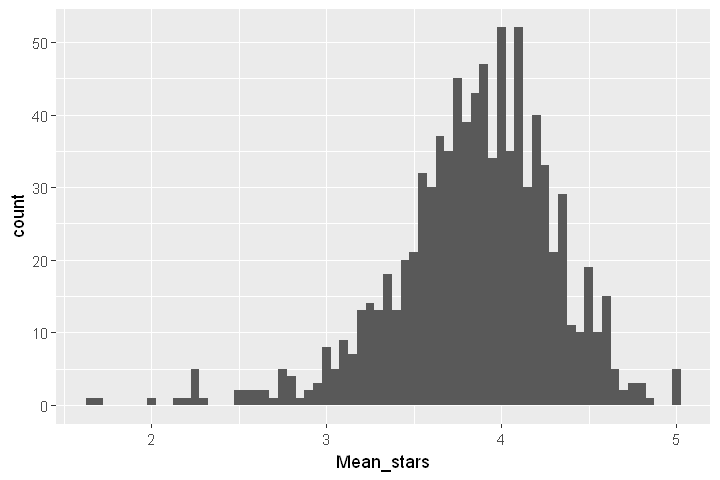

In [6]:
library(ggplot2)
library(sqldf)
df <- sqldf("select user_id, avg(stars) as Mean_stars from yelp_clt_df group by user_id")
#Setting the options for plot
options(repr.plot.width=6, repr.plot.height=4)
# distributon of product mean scores
ggplot(df, aes(Mean_stars)) +
  geom_histogram(binwidth = 0.05)

In [4]:
# Using the recommenderlab package we are converting the dataframe into realRatingMatrix object
#This stores the data in the sparse format
yelp_clt_RatingMatrix <- as(yelp_clt_df[c(2,3,4)], "realRatingMatrix")
#realRatingMatrix  <- normalize(r, method="Z-score")
#realRatingMatrix  <- normalize(r, method="center")

In [8]:
head(getRatingMatrix(yelp_clt_RatingMatrix))

   [[ suppressing 271 column names '1', '2', '3' ... ]]


6 x 271 sparse Matrix of class "dgCMatrix"
                                                                               
1 1 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
2 4 . . . . . . . . . . . . . . . . . . . 5 . . 5 . . . 5 . 5 . . . . . . . . .
3 5 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
4 5 . . . . . . . . . . . . . . . . . . . . . . . 5 . . . 5 . . . 4 . . . . . .
5 4 . . . . . . . 4 3 . . . . . . . . . . . . . . . . . . . . . . . . . 2 . . .
6 4 . . . . . . . . . 3 . . . . 4 . . . . 5 . . . . . . . . . . . 3 . . . . . .
                                                                               
1 . . . . . . . . . . . . . . . . . . . . . . 2 . . . . . . . . . . . . . . . .
2 . 5 . . . 5 . . 4 . . . . . . . . . . . . 3 4 . . . . . . 4 . . . . . . . . .
3 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 5 . . .
4 . . . . . . . 5 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

In [12]:
#Below are the different hyper paramters tried on the recommender models 
#param=list(normalize = "Z-score",method="Cosine",nn=5, minRating=1)
recommenders <- list(
                     "ALS" = list(name="ALS", param=NULL),
                    "IBCF" = list(name="IBCF",param=NULL ),
                    "SVD" = list(name="SVD", param=NULL),
                    "SVDF" = list(name="SVDF", param=NULL),
                    "Popular" = list(name="POPULAR", param=NULL), 
                    "UBCF" = list(name="UBCF", param=NULL),
                    "Random" = list(name="RANDOM", param=NULL)
                    )

ALS run fold/sample [model time/prediction time]
	 1  

Timing stopped at: 1.02 0 1.01


IBCF run fold/sample [model time/prediction time]
	 1  [0.21sec/0.01sec] 
	 2  [0.17sec/0.03sec] 
	 3  [0.23sec/0.03sec] 
	 4  [0.33sec/0.03sec] 
	 5  [0.19sec/0.02sec] 
SVD run fold/sample [model time/prediction time]
	 1  [0.03sec/0.03sec] 
	 2  [0.04sec/0.04sec] 
	 3  [0.05sec/0.16sec] 
	 4  [0.03sec/0.05sec] 
	 5  [0.03sec/0.05sec] 
SVDF run fold/sample [model time/prediction time]
	 1  [24sec/2.62sec] 
	 2  [24.8sec/2.72sec] 
	 3  [26.5sec/2.74sec] 
	 4  [23.4sec/2.5sec] 
	 5  [24.34sec/2.77sec] 
POPULAR run fold/sample [model time/prediction time]
	 1  [0.02sec/0.01sec] 
	 2  [0sec/0.01sec] 
	 3  [0sec/0.01sec] 
	 4  [0sec/0.03sec] 
	 5  [0sec/0sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0sec/0.39sec] 
	 2  [0sec/0.28sec] 
	 3  [0sec/0.28sec] 
	 4  [0.02sec/0.27sec] 
	 5  [0sec/0.39sec] 
RANDOM run fold/sample [model time/prediction time]
	 1  [0sec/0.03sec] 
	 2  [0sec/0.03sec] 
	 3  [0sec/0.03sec] 
	 4  [0sec/0.02sec] 
	 5  [0sec/0.03sec] 


Warning message in .local(x, method, ...):
"
  Recommender 'ALS' has failed and has been removed from the results!"

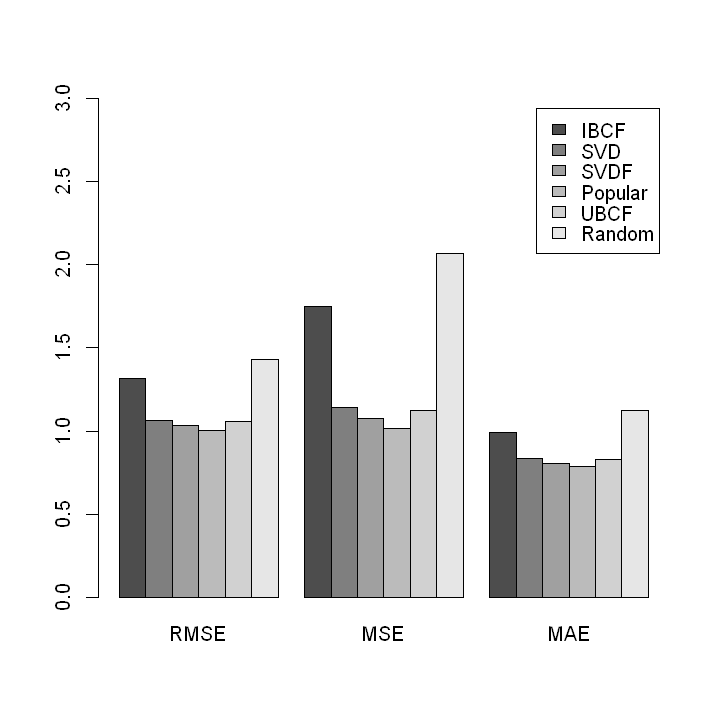

In [30]:
#Setting the options for plot
options(repr.plot.width=6, repr.plot.height=6)
#schema
Yelp_clt_schema <- evaluationScheme(yelp_clt_RatingMatrix, method="cross", k = 5, given=-1, goodRating=4)
# RMSE values for of all recommenders
Recommender_output <- evaluate(Yelp_clt_schema, recommenders, type = "ratings")
plot(Recommender_output, ylim = c(0,3))

###### Spliting the Data into train and test to evaluate TP, TN, FP, FN, Precision and recall  on each of the recommenders

In [5]:
#Splitting the Data into Training and Testing
Yelp_clt_schema <- evaluationScheme(yelp_clt_RatingMatrix, method="split", train = 0.8, given=-1, goodRating=4)
train_data <- getData(Yelp_clt_schema,"train")
test_data <-  getData(Yelp_clt_schema, "unknown")

###### Training the Recommender models

In [7]:
ALS <- Recommender(train_data, "ALS")
IBCF <- Recommender(train_data, "IBCF")
SVD <- Recommender(train_data, "SVD")
SVDF <- Recommender(train_data, "SVDF")
popular <- Recommender(train_data, "popular")
UBCF <- Recommender(train_data, "UBCF")
Random <- Recommender(train_data, "RANDOM")

###### Predicting on the training data

In [8]:
ALS_predict <- predict(ALS, getData(Yelp_clt_schema, "known"), type="ratings")
IBCF_predict <- predict(IBCF, getData(Yelp_clt_schema, "known"), type="ratings")
SVD_predict <- predict(SVD, getData(Yelp_clt_schema, "known"), type="ratings")
SVDF_predict <- predict(SVDF, getData(Yelp_clt_schema, "known"), type="ratings")
popular_predict <- predict(popular, getData(Yelp_clt_schema, "known"), type="ratings")
UBCF_predict <- predict(UBCF, getData(Yelp_clt_schema, "known"), type="ratings")
Random_predict <- predict(Random, getData(Yelp_clt_schema, "known"), type="ratings")

In [9]:
Error <- calcPredictionAccuracy(ALS_predict, test_data)
Error

RMSE       MSE       MAE 
1.0595719 1.1226926 0.8308424

In [10]:
# Calculating prediction accuracy of recommender algorithms on test data
Error <- rbind(
            ALS = calcPredictionAccuracy(ALS_predict, test_data), 
            IBCF = calcPredictionAccuracy(IBCF_predict, test_data),
            SVD = calcPredictionAccuracy(SVD_predict, test_data),
            SVDF = calcPredictionAccuracy(SVDF_predict, test_data), 
            Popular = calcPredictionAccuracy(popular_predict, test_data), 
            UBCF = calcPredictionAccuracy(UBCF_predict,test_data),
            Random = calcPredictionAccuracy(Random_predict, test_data)
            )
Error

,RMSE,MSE,MAE
ALS,1.0595719,1.1226926,0.8308424
IBCF,1.3573350,1.8423583,1.0564788
SVD,0.9850461,0.9703157,0.7713539
SVDF,0.9355801,0.8753100,0.7208801
Popular,0.9669785,0.9350475,0.7537956
UBCF,0.9827622,0.9658214,0.7765417
Random,1.2913855,1.6676765,1.0210280


###### Ensemble recommender system (Using more than 1 recommedation method)

In [6]:
#Code is inspired from https://rdrr.io/cran/recommenderlab/man/HybridRecommender.html
CB_ensemble<- HybridRecommender(
                                Recommender(train_data, method = "SVDF"), 
                                Recommender(train_data, method = "Popular"), 
                                Recommender(train_data, method = "UBCF"), 
                                weights = c(0.5,0.3,0.2)
                                )
CB_ensemble_recommender <- getModel(CB_ensemble)
CB_ensemble_predict <- predict(CB_ensemble, getData(Yelp_clt_schema, "known"), type="ratings")
Error <- calcPredictionAccuracy(CB_ensemble_predict, test_data)
Error


RMSE       MSE       MAE 
1.1084436 1.2286471 0.8300297

ALS run fold/sample [model time/prediction time]
	 1  [0.08sec/12.12sec] 


Evaluation results for 1 folds/samples using method 'ALS'.

,TP,FP,FN,TN,precision,recall,TPR,FPR
5,0.01675978,4.983240,0.6536313,266.3464,0.003351955,0.02500000,0.02500000,0.01836598
10,0.02793296,9.972067,0.6424581,261.3575,0.002793296,0.04166667,0.04166667,0.03675258
15,0.03910615,14.960894,0.6312849,256.3687,0.002607076,0.05833333,0.05833333,0.05513918
20,0.04469274,19.955307,0.6256983,251.3743,0.002234637,0.06666667,0.06666667,0.07354639


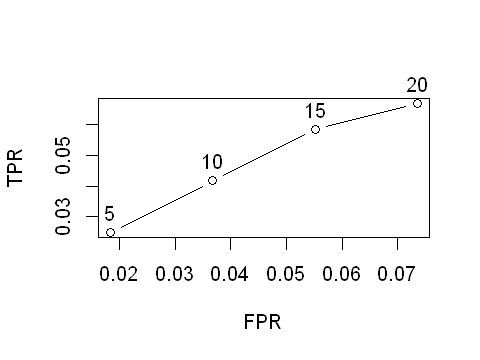

In [12]:
#Setting the options for plot
options(repr.plot.width=4, repr.plot.height=3)
#Confustion Matrix for ALS
ALS_topNList <- evaluate(Yelp_clt_schema, method="ALS", type = "topNList", n=c(5,10,15,20))
ALS_topNList
getConfusionMatrix(ALS_topNList)
plot(ALS_topNList , annotate=TRUE)

IBCF run fold/sample [model time/prediction time]
	 1  [0.22sec/0.28sec] 


Evaluation results for 1 folds/samples using method 'IBCF'.

,TP,FP,FN,TN,precision,recall,TPR,FPR
5,0.01117318,4.932961,0.6592179,266.3966,0.002259887,0.01666667,0.01666667,0.01818045
10,0.02234637,9.865922,0.6480447,261.4637,0.002259887,0.03333333,0.03333333,0.03636090
15,0.03910615,14.793296,0.6312849,256.5363,0.002636535,0.05833333,0.05833333,0.05452073
20,0.04469274,19.720670,0.6256983,251.6089,0.002259887,0.06666667,0.06666667,0.07268057


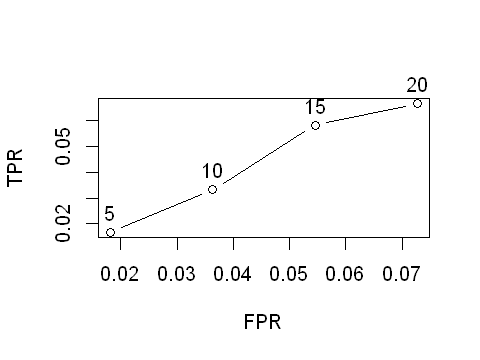

In [13]:
#Confustion Matrix for IBCF
IBCF_topNList <- evaluate(Yelp_clt_schema, method="IBCF", type = "topNList", n=c(5,10,15,20))
IBCF_topNList
getConfusionMatrix(IBCF_topNList)
plot(IBCF_topNList, annotate=TRUE)

SVD run fold/sample [model time/prediction time]
	 1  [0.48sec/0.09sec] 


Evaluation results for 1 folds/samples using method 'SVD'.

,TP,FP,FN,TN,precision,recall,TPR,FPR
5,0.02793296,4.972067,0.6424581,266.3575,0.005586592,0.04166667,0.04166667,0.01832475
10,0.04469274,9.955307,0.6256983,261.3743,0.004469274,0.06666667,0.06666667,0.03669074
15,0.06145251,14.938547,0.6089385,256.3911,0.004096834,0.09166667,0.09166667,0.05505672
20,0.07821229,19.921788,0.5921788,251.4078,0.003910615,0.11666667,0.11666667,0.07342270


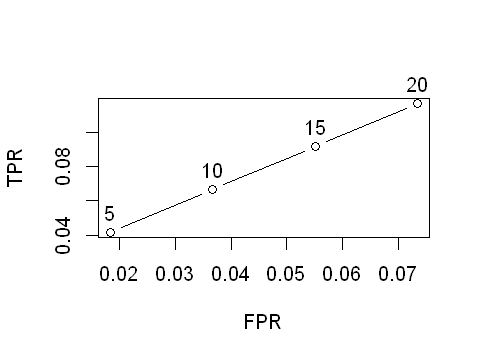

In [14]:
#Confustion Matrix for SVD
SVD_topNList <- evaluate(Yelp_clt_schema, method="SVD", type = "topNList", n=c(5,10,15,20))
SVD_topNList
getConfusionMatrix(SVD_topNList)
plot(SVD_topNList, annotate=TRUE)

SVDF run fold/sample [model time/prediction time]
	 1  [22.01sec/2.23sec] 


Evaluation results for 1 folds/samples using method 'SVDF'.

,TP,FP,FN,TN,precision,recall,TPR,FPR
5,0.01117318,4.988827,0.6592179,266.3408,0.002234637,0.01666667,0.01666667,0.01838660
10,0.02234637,9.977654,0.6480447,261.3520,0.002234637,0.03333333,0.03333333,0.03677319
15,0.03910615,14.960894,0.6312849,256.3687,0.002607076,0.05833333,0.05833333,0.05513918
20,0.06145251,19.938547,0.6089385,251.3911,0.003072626,0.09166667,0.09166667,0.07348454


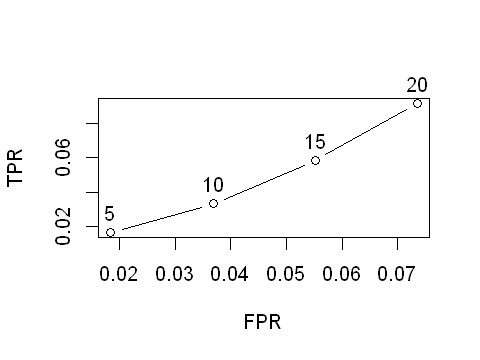

In [15]:
#Confustion Matrix for SVDF
SVDF_topNList <- evaluate(Yelp_clt_schema, method="SVDF", type = "topNList", n=c(5,10,15,20))
SVDF_topNList
getConfusionMatrix(SVDF_topNList)
plot(SVDF_topNList, annotate=TRUE)

popular run fold/sample [model time/prediction time]
	 1  [0sec/0.34sec] 


Evaluation results for 1 folds/samples using method 'POPULAR'.

,TP,FP,FN,TN,precision,recall,TPR,FPR
5,0.02234637,4.977654,0.6480447,266.3520,0.004469274,0.03333333,0.03333333,0.01834537
10,0.06145251,9.938547,0.6089385,261.3911,0.006145251,0.09166667,0.09166667,0.03662889
15,0.06703911,14.932961,0.6033520,256.3966,0.004469274,0.10000000,0.10000000,0.05503610
20,0.08379888,19.916201,0.5865922,251.4134,0.004189944,0.12500000,0.12500000,0.07340209


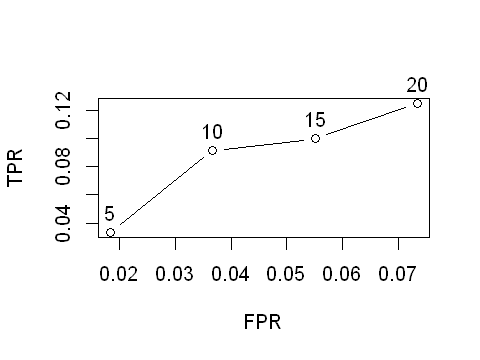

In [16]:
#Confustion Matrix for popular
popular_topNList <- evaluate(Yelp_clt_schema, method="popular", type = "topNList", n=c(5,10,15,20))
popular_topNList
getConfusionMatrix(popular_topNList)
plot(popular_topNList, annotate=TRUE)

UBCF run fold/sample [model time/prediction time]
	 1  [0sec/0.31sec] 


Evaluation results for 1 folds/samples using method 'UBCF'.

,TP,FP,FN,TN,precision,recall,TPR,FPR
5,0.01675978,4.983240,0.6536313,266.3464,0.003351955,0.0250000,0.0250000,0.01836598
10,0.05027933,9.949721,0.6201117,261.3799,0.005027933,0.0750000,0.0750000,0.03667012
15,0.06703911,14.932961,0.6033520,256.3966,0.004469274,0.1000000,0.1000000,0.05503610
20,0.09497207,19.905028,0.5754190,251.4246,0.004748603,0.1416667,0.1416667,0.07336086


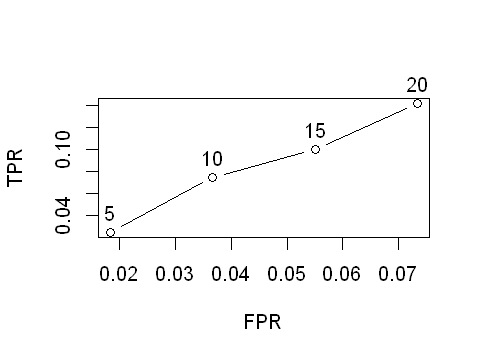

In [17]:
#Confustion Matrix for UBCF
UBCF_topNList <- evaluate(Yelp_clt_schema, method="UBCF", type = "topNList", n=c(5,10,15,20))
UBCF_topNList
getConfusionMatrix(UBCF_topNList)
plot(UBCF_topNList, annotate=TRUE)

Random run fold/sample [model time/prediction time]
	 1  [0.01sec/0.11sec] 


Evaluation results for 1 folds/samples using method 'RANDOM'.

,TP,FP,FN,TN,precision,recall,TPR,FPR
5,0.00000000,5.000000,0.6703911,266.3296,0.0000000000,0.00000000,0.00000000,0.01842783
10,0.01117318,9.988827,0.6592179,261.3408,0.0011173184,0.01666667,0.01666667,0.03681442
15,0.01117318,14.988827,0.6592179,256.3408,0.0007448790,0.01666667,0.01666667,0.05524225
20,0.01675978,19.983240,0.6536313,251.3464,0.0008379888,0.02500000,0.02500000,0.07364946


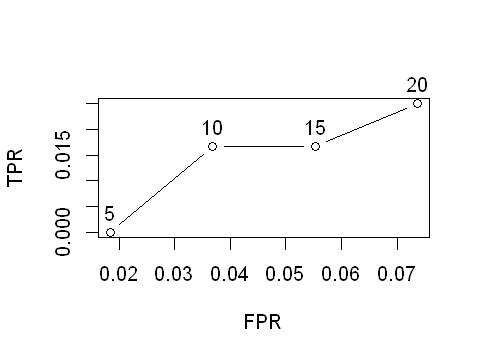

In [18]:
#Confustion Matrix for Random based recommender system
Random_topNList <- evaluate(Yelp_clt_schema, method="Random", type = "topNList", n=c(5,10,15,20))
Random_topNList
getConfusionMatrix(Random_topNList)
plot(Random_topNList, annotate=TRUE)

References:
* http://bigdata-doctor.com/recommender-systems-101-practical-example-in-r/

* https://www.r-bloggers.com/recommender-systems-101-a-step-by-step-practical-example-in-r/

* https://cran.r-project.org/web/packages/recommenderlab/recommenderlab.pdf